# Декораторы

### Немного вспомним про функции

Мы с вами уже знаем, что в питоне любая **функция** это **объект**. Функции можно записывать в переменные и передавать в другие функции. Такие функции (в которые мы передаём другие функции) называются **фукциями высшего порядка**.

Мы с ними уже хорошо знакомы, например: `map`, `filter`, `partial` и др

In [8]:
def inc(a):
    return a + 1


for i in map(inc, [1, 2, 3, 4, 5]):
    print(i)

2
3
4
5
6


## Формулируем проблему

Как же с этим связаны декораторы, что они такое и зачем они нужны? Давайте сформулируем проблему на игрушечном примере.

Допустим, что у нас есть много функций, которые выполняют какую-то работу

In [14]:
import random


def small_work():
    for _ in range(10000):
        random.uniform(0, 1000) ** random.uniform(0, 5)
        
def medium_work():
    for _ in range(100000):
        random.uniform(0, 1000) ** random.uniform(0, 5)
        
def big_work():
    for _ in range(1000000):
        random.uniform(0, 1000) ** random.uniform(0, 5)

Мы хотим замерить время выполнения этих функций

In [17]:
import time


start = time.time()
small_work()
end = time.time()
print(f"Function small_work has finished in {end - start} second")

start = time.time()
medium_work()
end = time.time()
print(f"Function medium_work has finished in {end - start} second")

start = time.time()
big_work()
end = time.time()
print(f"Function big_work has finished in {end - start} second")

Function small_work has finished in 0.0036613941192626953 second
Function medium_work has finished in 0.06051754951477051 second
Function big_work has finished in 0.29753589630126953 second


Это не самый удобный способ, нам 3 раза пришлось написать один и тот же код, это точно можно упростить

In [18]:
for function in [small_work, medium_work, big_work]:
    start = time.time()
    function()
    end = time.time()
    print(f"Function {function.__name__} has finished in {end - start} second")

Function small_work has finished in 0.003774404525756836 second
Function medium_work has finished in 0.04727053642272949 second
Function big_work has finished in 0.29998779296875 second


Уже лучше, но этот способ будет очень неудобен, если наши функции будут принимать какие-то аргументы. В таком случае нам пришлось бы составлять их списки и итерироваться по ним в том числе.

## Базовый синтаксис декораторов

Для того, чтобы избежать всех этих проблем напишем вот такую конструкцию

In [20]:
def measure_time(func):
    def inner_function():
        start = time.time()
        func()
        end = time.time()
        print(f"Function {func.__name__} has finished in {end - start} second")
    return inner_function

```python
def measure_time(func):
    def inner_function():
        start = time.time()
        func()
        end = time.time()
        print(f"Function {func.__name__} has finished in {end - start} second")
    return inner_function
```

In [21]:
small_work = measure_time(small_work)
medium_work = measure_time(medium_work)
big_work = measure_time(big_work)

small_work()
medium_work()
big_work()

Function small_work has finished in 0.0066547393798828125 second
Function medium_work has finished in 0.06227469444274902 second
Function big_work has finished in 0.31817173957824707 second


Давайте разберём, что здесь произошло. Мы создали функцию `measure_time`, которая принимает на вход любую другую функцию, мы будем передавать в неё наши `xxxx_work`, Внутри мы через `def` объявляем новую функцию `inner_func`, которую затем возвращаем. Обратите внимание, что внутри `measure_time` мы **НЕ вызываем** `inner_func`, а просто возвращаем её как объект. После возвращения из `measure_time` функция `inner_func` запишется в переменную `small_work` вот в этой строке
```python
small_work = measure_time(small_work)
```
Пока мы не разбирали, что происходит в `inner_func`, нам было важно лишь то, что её объявили внутри функции `measure_time` и вернули из неё.

Но всё-таки интересно, что там произошло. Ведь этой самой функцией мы по сути подменяем наши оригинальные (как в примере выше). Давайте разбираться

Внутри `inner_function` происходит знакомый нам расчёт времени выполнения функции `func`, которая изначально была передана в `measure_time`. По сути сам вызов функции не изменятся, он только "оборачивается" в дополнительный функционал вычисления времени выполнения (или иначе говоря, **"декорируется"**) и запаковывается в новую функцию `inner_func`, которая возвращается нам.

Функция `measure_time` является **декоратором**, а `func` **декорируемой** функцией. Проще говоря, декораторы просто "оборачивают" наши функции в дополнительный функционал, без изменений их кода и логики работы. Т.е. `func` отрабатывает без изменений, но добавляется дополнительный код до и после её вызова.

На картинке обозначены основные элементы декоратора
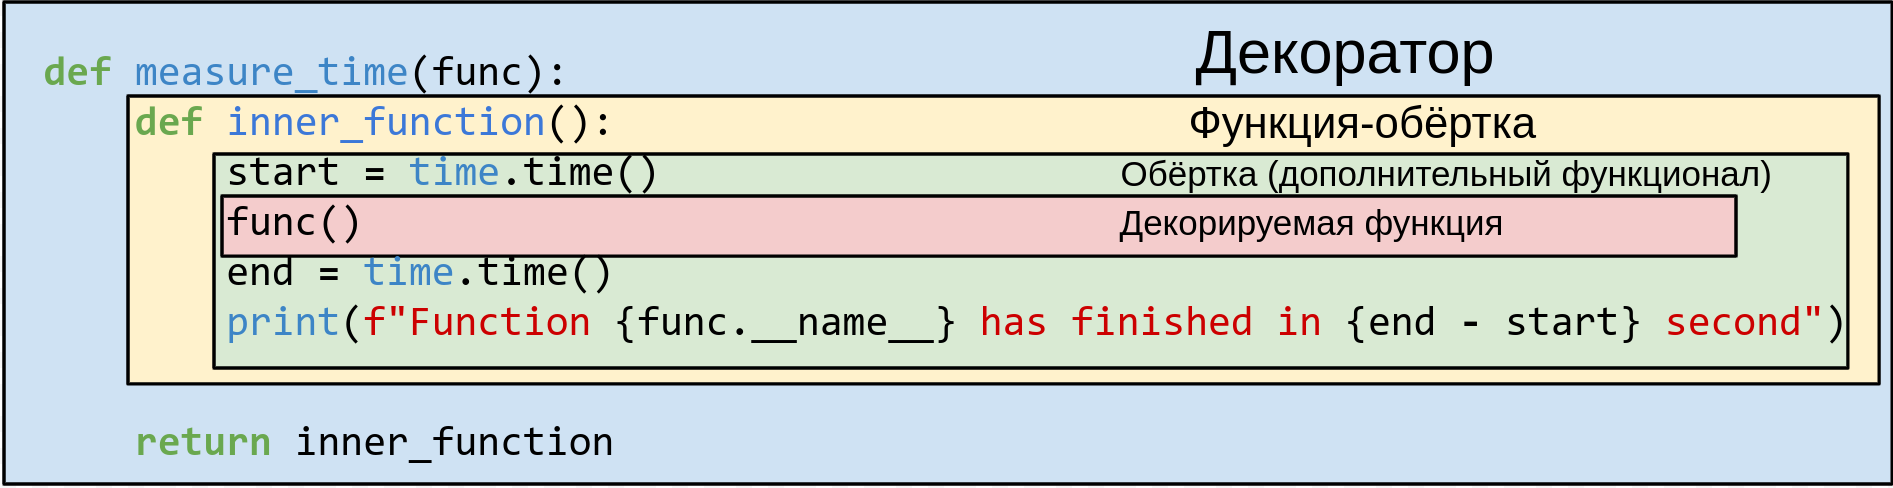

Пример выше демонстрирует основной синтаксис декораторов в питоне и да, это выглядит страшно :)

## Декорируем функции, принимающие аргументы

Мы можем сделать ещё одно улучшение и добавить возможность принимать функции с любыми аргументами, а также возвращать значение

In [32]:
def measure_time(func):
    def inner_function(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"Function {func.__name__} has finished in {end - start} second")
        return result
    return inner_function

Теперь функция на выходе из декоратора будет принимать любое количество позиционных и именованных аргументов, которые затем будут просто "пробрасываться" в внутренний вызов `func`.

Результат выполнения нашей декорируемой функции мы сохранили в переменную `result` и возвращаем её в самом конце.

Убедимся, что всё работает на примерах

In [38]:
def add(a, b):
    return a + b

def square_list(lst):
    return [i**2 for i in lst]

def invert_dictionary(dct):
    return dict(zip(dct.values(), dct.keys()))

def repeat_string(string, n_repeats=2):
    return string * n_repeats

In [39]:
add = measure_time(add)
square_list = measure_time(square_list)
invert_dictionary = measure_time(invert_dictionary)
repeat_string = measure_time(repeat_string)


print(add(10012401204, 3893475983475))
print(square_list(list(range(25))))
print(invert_dictionary({"a": 1, "b": 2, "c": 3, "d": 4}))
print(repeat_string("ABCDEFG*", n_repeats=10))

Function add has finished in 1.430511474609375e-06 second
3903488384679
Function square_list has finished in 1.1682510375976562e-05 second
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576]
Function invert_dictionary has finished in 4.76837158203125e-06 second
{1: 'a', 2: 'b', 3: 'c', 4: 'd'}
Function repeat_string has finished in 2.1457672119140625e-06 second
ABCDEFG*ABCDEFG*ABCDEFG*ABCDEFG*ABCDEFG*ABCDEFG*ABCDEFG*ABCDEFG*ABCDEFG*ABCDEFG*


## Делаем запись более удобной

Всё работает! Функции выполняют свои обычные операции и при этом пишут сообщения о времени выполнения. Заметим только, что нам всё равно приходится вручную декорировать наши функции вот такой неудобной записью
```python
add = measure_time(add)
square_list = measure_time(square_list)
invert_dictionary = measure_time(invert_dictionary)
repeat_string = measure_time(repeat_string)
```
Это исправимо, в питоне для этого есть специальный синтаксический сахар. При объявлении функций мы как бы помечаем их следующим образом

In [40]:
@measure_time
def add(a, b):
    return a + b

@measure_time
def square_list(lst):
    return [i**2 for i in lst]

@measure_time
def invert_dictionary(dct):
    return dict(zip(dct.values(), dct.keys()))

@measure_time
def repeat_string(string, n_repeats=2):
    return string * n_repeats


print(add(10012401204, 3893475983475))
print(square_list(list(range(25))))
print(invert_dictionary({"a": 1, "b": 2, "c": 3, "d": 4}))
print(repeat_string("ABCDEFG*", n_repeats=10))

Function add has finished in 1.1920928955078125e-06 second
3903488384679
Function square_list has finished in 1.0728836059570312e-05 second
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576]
Function invert_dictionary has finished in 5.0067901611328125e-06 second
{1: 'a', 2: 'b', 3: 'c', 4: 'd'}
Function repeat_string has finished in 1.9073486328125e-06 second
ABCDEFG*ABCDEFG*ABCDEFG*ABCDEFG*ABCDEFG*ABCDEFG*ABCDEFG*ABCDEFG*ABCDEFG*ABCDEFG*


Всё работает точно также, но синтаксис стал намного красивее. Теперь мы можем "повесить" `@measure_time` на любую функцию в нашей программе и она будет способна измерять время своего исполнения. Как вы уже поняли записи
```python
@measure_time
def add(a, b):
    ...
```
и
```python
add = measure_time(add)
```
абсолютно равнозначны

## Декораторы с параметрами

А что если мы захотим как-то управлять поведением декоратора, например, передавать ему какие-то параметры? Для демонстрации мы попытаемся написать декоратор, который заставит функцию выполняться, пока та не отработает без ошибок.

Но для начала напишем такую функцию

In [80]:
def problematic_function(probability_of_error):
    if random.random() < probability_of_error:
        raise RuntimeError
    else:
        return "Success"

Функция принимает один аргумент - вероятность ошибки, наша задача написать декоратор, который заставит её выполняться определённое число попыток или же до успешного исполнения.

Без декоратора это выглядело бы примерно так

In [108]:
n_tries = 5
for _ in range(n_tries):
    try:
        print(problematic_function(0.9))
        break
    except RuntimeError:
        continue
else:
    raise RuntimeError

Success


Давайте напишем декоратор, который будет принимать число попыток, но ещё добавим возможность исполнения до успеха

In [110]:
def try_n_times(func, n_tries=None):
    def inner_func(*args, **kwargs):
        try_num = 0
        while try_num != n_tries:
            try:
                return func(*args, **kwargs)
            except RuntimeError:
                try_num += 1
                continue
        else:
            raise RuntimeError
    return inner_func

In [111]:
@try_n_times(n_tries=5)
def problematic_function(probability_of_error):
    if random.random() < probability_of_error:
        raise RuntimeError
    else:
        return "Success"

TypeError: try_n_times() missing 1 required positional argument: 'func'

Не работает, давайте теперь попробуем обычный синтаксис декорирования

In [112]:
problematic_function = try_n_times(problematic_function, n_tries=5)

In [115]:
problematic_function(0.9)

'Success'

На этот раз всё работает. Дело в том, что синтаксис `@` ожидает, что декоратор будет принимать всего один аргумент - **декорируемую функцию**, поэтому мы не можем передать никакие параметры. Однако, мы очень часто видим, что декораторы в различных библиотеках могут принимать параметры, вот пример из фреймворка *Flask*

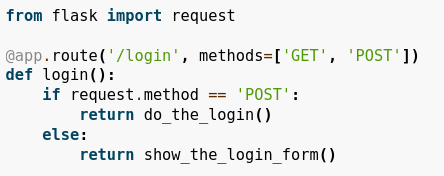

Как же это работает? Давайте разберём, здесь всё будет довольно запутанно...

In [117]:
def try_n_times(n_tries=None):
    def decorator(func):
        def inner_func(*args, **kwargs):
            try_num = 0
            while try_num != n_tries:
                try:
                    return func(*args, **kwargs)
                except RuntimeError:
                    try_num += 1
                    continue
            else:
                raise RuntimeError
        return inner_func
    return decorator

In [118]:
@try_n_times(n_tries=5)
def problematic_function(probability_of_error):
    if random.random() < probability_of_error:
        raise RuntimeError
    else:
        return "Success"

In [135]:
problematic_function(0.9)

'Success'

В этот раз всё работает, разберём код

По сути здесь не произошло принципиальных изменений, мы лишь обернули наш декоратор ещё в одну функцию, но зачем?

Во-первых, стоит заметить, что то, что было декоратором в предыдущем примере (функция `decorator`) теперь принимает всего один аргумент - **декорируемую функцию**, т.е. мы удовлетворили данному условию использования `@`.

Во-вторых, у нас появилась новая функция - `try_n_times`. Обратите внимание на то, что она не является декоратором, так как не принимает на вход другую функцию, она принимает только параметр `n_tries`. Но зачем же она нужна? Последняя строка этой функции говорит сама за себя, она **возвращает декоратор**. Причём этот декоратор имеет заданные свойства, так как сохраняет в себе данные о количестве попыток, которые нужно произвести (`n_tries`)

Так что же на самом деле произошло здесь?
```python
@try_n_times(n_tries=5)
def problematic_function(probability_of_error):
```
Мы уже знаем, что `try_n_times` не является декоратором, но она возвращает декоратор, который будет пытаться выполнить функцию 5 раз. Т.е. запись выше в процессе выполнения раскрывается в нечто подобное
```python
decorator = try_n_times(n_tries=5)
@decorator
def problematic_function(probability_of_error):
```

## Замыкания

Вы уже заметили, что при использовании декораторов мы постоянно используем переменные из более внешних областей видимости во вложенных функциях. Например, параметр `n_tries` в примере выше. Декорируемая функция тоже не является исключением, так как мы используем её в более вложенных. Но это работает не только с декораторами. Рассмотрим вот такой пример...

In [156]:
a = 5

def wrapper(a):
    def func():
        return a
    return func
    
func = wrapper(a)

Мы вызываем функцию `wrapper` с одним аргументом, которая отдаёт нам функцию `func`, "запомнившую" этот аргумент и возвращающую его. Убедимся, что это работает.

In [157]:
func()

5

Здесь также важно заметить, что `func` "запоминает" НЕ переменную `a` из глобального окружения, а переменную `a` из локального окружения функции `wrapper`. Убедимся в этом, удалив глобальную переменную `a`

In [158]:
del a
func()

5

Функция по прежнему работает, хотя переменная была удалена, значит, что она её "запомнила". Ещё раз убедимся в этом, явно указав функции `func`, что нужно использовать глобальную переменную. После удаления переменной и вызова функции мы получим ошибку

In [160]:
a = 5

def wrapper(a):
    def func():
        global a
        return a
    return func
    
func = wrapper(a)
del a
func()

NameError: name 'a' is not defined

Такой механиханизм "запоминания" (а если точнее &mdash; функция использующая такие внешние переменные) называется **замыканием (closure)**.

В питоне есть сборщик мусора, которые удаляет все объекты на которые не осталось ссылок. Команда `del` как раз таки удаляет эти ссылки (не объекты). Получается, что в замыкании создаются новые ссылки, так как функция спокойно работает после удаления внешней переменной. А если есть новые ссылки, получается, что эти данные можно как-то достать

In [164]:
a = 5
b = [1, 2, 3]
c = {1: 2, "a": "b"}

def wrapper(a, b, c):
    def func():
        return a, b, c
    return func
    
func = wrapper(a, b, c)

Ради интереса мы положили в замыкание чуть больше разных объектов. До списка этих объектов можно достучаться через атрибут `__closure__` у функции, но я не знаю где вам это может пригодиться :)

In [169]:
for element_idx in range(3):
    print(func.__closure__[element_idx].cell_contents)

5
[1, 2, 3]
{1: 2, 'a': 'b'}


# Полезные декораторы

В этом разделе мы поговорим о библиотечных и встроенных декораторах, которые довольно полезны и рекомендуются к применению. Для удобства полный список с ссылками приведён ниже:

+ [classmethod и staticmethod](https://webdevblog.ru/obyasnenie-classmethod-i-staticmethod-v-python/)
+ [functools.lru_cache](https://docs-python.ru/standart-library/modul-functools-python/dekorator-lru-cache-modulja-functools/)
+ [dataclass](https://habr.com/ru/post/415829/)
+ [property](https://www.programiz.com/python-programming/property)
+ [wraps](https://stackoverflow.com/questions/308999/what-does-functools-wraps-do)

## classmethod

Декоратор `classmethod` необходим для того, чтобы сделать метод классовым

Допустим, что у нас есть класс, представляющий структуру данных похожую на словарь и мы хотим уметь создавать её разными способами

In [194]:
class MyCustomMap:
    def __init__(self, dct=None):
        self.__map = dct
        
    def from_dict(self, dct):
        return MyCustomMap(dct)
    
    def from_lists(self, list1, list2):
        return MyCustomMap(dict(zip(list1, list2)))
    
    def from_strings(self, str1, str2):
        return MyCustomMap(dict(zip(str1, str2)))
    
    def __repr__(self):
        return f"My cusom map {self.__map}"

Очевидно, что данные методы используются только для создания объектов. Они никак не взаимодействуют с данными, хранящимися в атрибутах объектов, а значит им вовсе необязательно быть связанными с объектами. К тому же вызывать их мы сможем только от объектов, что не очень удобно.

In [191]:
MyCustomMap.from_strings("ABCD", "EFGH")   # Пытаемся вызывать метод from_strings от класса. Ничего не получается, так как метод ожидает объект данного класса (self) в качестве первого аргумента

TypeError: from_strings() missing 1 required positional argument: 'str2'

In [196]:
MyCustomMap().from_strings("ABCD", "EFGH")   # Получилось, но мы бы не хотели создавать объект MyCustomMap()

My cusom map {'A': 'E', 'B': 'F', 'C': 'G', 'D': 'H'}

Мы хотим, чтобы было как в пандасе с созданием датафрейма, примеры ниже

In [197]:
import pandas as pd


pd.DataFrame.from_dict({"Column1": [1, 2]})

,Column1
0,1
1,2


In [198]:
pd.DataFrame.from_records([("A", "1"), ("B", 2)])

,0,1
0,A,1
1,B,2


Здесь методы `from_dict` и `from_records` являются **методами класса** `DataFrame` и для их вызова не обязательно иметь объект. Сделаем также с нашими методами.

In [206]:
class MyCustomMap:
    def __init__(self, dct=None):
        self.__map = dct
    
    @classmethod
    def from_dict(cls, dct):
        return cls(dct)
    
    @classmethod
    def from_lists(cls, list1, list2):
        return cls(dict(zip(list1, list2)))

    @classmethod
    def from_strings(cls, str1, str2):
        return cls(dict(zip(str1, str2)))
    
    def __repr__(self):
        return f"My cusom map {self.__map}"

In [204]:
MyCustomMap.from_strings("ABCD", "EFGH")

My cusom map {'A': 'E', 'B': 'F', 'C': 'G', 'D': 'H'}

Всё отлично работает, мы всего лишь указали декоратор `classmethod` для методов, которые мы хотели сделать классовыми.

❗Обратите внимание, что методы класса ведут себя немного по другому. Первым аргументом к ним попадает **не объект** данного класса, а **сам класс**, поэтому первый аргумент у методов класса принято называть `cls` вместо `self` (cls - сокращение от **cl**as**s**). Используя эту особенность, мы также смогли избавиться от явного указания класса, объект которого мы хотим создать. В нашей ситуации `cls` во всех методах это `MyCustomMap`.

При этом всём классовый метод можно вызвать и от объекта, ничего не поломается.

In [207]:
MyCustomMap().from_strings("ABCD", "EFGH")

<class 'type'>


My cusom map {'A': 'E', 'B': 'F', 'C': 'G', 'D': 'H'}

## staticmethod

Сделаем класс, собирающий информацию о загрузке и температуре процессора в течение времени

In [221]:
import psutil
from datetime import datetime


class CPUMonitor:
    def __init__(self):
        self._times = []
        self._loads = []
        self._temps = []
        
    def record(self, seconds):
        start_time = datetime.now()
        print("Recording started...")
        while True:
            self._times.append(datetime.now())
            cpu_load = self.get_cpu_load()
            self._loads.append(cpu_load)
            cpu_temp = self.get_cpu_temperature()
            self._temps.append(cpu_temp)
            print(f"\rRecording in progress... Current CPU load: {cpu_load}%, Current CPU temperature: {cpu_temp}", end="")
            if (self._times[-1] - start_time).total_seconds() > seconds:
                print("\nRecording stopped")
                break
                
    def reset(self):
        self._times = []
        self._loads = []
        self._temps = []
        
    def get_cpu_temperature(self):
        tdie = psutil.sensors_temperatures()["k10temp"][1].current
        return tdie
    
    def get_cpu_load(self):
        load_percent = psutil.cpu_percent()
        return load_percent

In [223]:
monitor = CPUMonitor()
monitor.record(5)

Recording started...
Recording in progress... Current CPU load: 0.0%, Current CPU temperature: 40.0255
Recording stopped


Но нас интересует не столько сам класс, сколько методы `get_cpu_temperature` и `get_cpu_load`, что же в них необычного?

Давайте посмотрим на них внимательно. Оба метода в данный момент связаны с объеком класса, но никак это не используют (т.е. никак не взаимодействуют с объектом с которым связаны). Логично тогда предположить, что из этих методов можно сделать методы класса при помощи декоратора о котором мы говорили раньше. В таком случае методы будут связаны с классом, но опять никак не будут использовать эту связь.

Получается так, что эти методы вообще не могут иметь никакой связи с классом и его объектами и, видимо, просто стоило сделать их них отдельные функции... Или всё таки нет...?

Дело в том, что эти методы действительно не связаны с классом какими-то общими данными, однако **по смыслу** функционал методов прекрасно интегрируется в класс. Т.е. нахождение методов для получения параметров процессора в классе для мониторинга этих параметров это очень уместное решение. Если бы эти методы на самом деле были отдельными функциями, то нам не удалось бы красиво инкапсулировать всё в один класс. Они связаны с классом **по смыслу**

Специально для таких методов в питоне есть декоратор `staticmethod`, он позволяет превращать методы в **статические**

In [232]:
class CPUMonitor:
    def __init__(self):
        self._times = []
        self._loads = []
        self._temps = []
        
    def record(self, seconds):
        start_time = datetime.now()
        print("Recording started...")
        while True:
            self._times.append(datetime.now())
            cpu_load = self.get_cpu_load()
            self._loads.append(cpu_load)
            cpu_temp = self.get_cpu_temperature()
            self._temps.append(cpu_temp)
            print(f"\rRecording in progress... Current CPU load: {cpu_load}%, Current CPU temperature: {cpu_temp}", end="")
            if (self._times[-1] - start_time).total_seconds() > seconds:
                print("\nRecording stopped")
                break
                
    def reset(self):
        self._times = []
        self._loads = []
        self._temps = []
    
    @staticmethod
    def get_cpu_temperature(format_=False):
        tdie = psutil.sensors_temperatures()["k10temp"][1].current
        if format_:
            tdie = str(tdie) + "°C"
        return tdie
    
    @staticmethod
    def get_cpu_load(format_=False):
        load_percent = psutil.cpu_percent()
        if format_:
            load_percent = str(load_percent) + "%"
        return load_percent

In [233]:
monitor = CPUMonitor()
monitor.record(5)

Recording started...
Recording in progress... Current CPU load: 0.0%, Current CPU temperature: 38.2555
Recording stopped


Статические методы работают просто как функции, привязанные к классам. Т.е. мы можем обращаться к ним через точку от класса или объекта, но никак не можем получить изнутри метода данные об объекте или классе.

❗Статические методы **не принимают** объект или класс первым аргументом, они работают как обычные функции. Их можно вызывать от объектов и классов одинаково, передавая аргументы "как есть"

In [241]:
print(CPUMonitor.get_cpu_temperature(format_=True))
print(CPUMonitor().get_cpu_temperature(format_=True))
print(CPUMonitor.get_cpu_load())
print(CPUMonitor().get_cpu_load())

34.125°C
34.25°C
0.7
0.0


## functools.lru_cache

Возьмём самый избитый пример - расчёт чисел Фиббоначи через рекурсию

In [291]:
def fibonacсi(n):
    return fibonacсi(n - 1) + fibonacсi(n - 2) if n > 2 else 1

In [292]:
%%time
fibonacсi(38)

CPU times: user 3.68 s, sys: 0 ns, total: 3.68 s
Wall time: 3.69 s


39088169

Все вы прекрасно знаете, что этот код работает долго и что в процессе выполнения образуется целое дерево рекурсивных вызовов, вычисляющих одно и то же.

На ум приходит одно решение - кэшировать результаты. В таком случае функция сначала проверит, есть ли в кэше данные о результате выполнения с текущими аргументами. Если такие данные есть то они возвращаются без исполнения функции.

Подобное кэширование в питоне осуществляет декоратор `lru_cache` из модуля `functools`.

In [293]:
from functools import lru_cache


@lru_cache
def fibonacсi(n):
    return fibonacсi(n - 1) + fibonacсi(n - 2) if n > 2 else 1

In [294]:
%%time
fibonacсi(38)

CPU times: user 32 µs, sys: 0 ns, total: 32 µs
Wall time: 35.8 µs


39088169

Время выполнения функции уменьшилось в $10^5$ раз за счёт кэширования результатов!

`lru_cache` так же позволяет ограничить размера кэша. В таком случае туда динамически будут загружаться самые часто используемые значения. Это может быть полезным, если есть необходимость экономить память

In [309]:
@lru_cache(maxsize=128)
def fibonacсi(n):
    return fibonacсi(n - 1) + fibonacсi(n - 2) if n > 2 else 1

In [310]:
%%time
fibonacci(1000)

CPU times: user 725 µs, sys: 0 ns, total: 725 µs
Wall time: 735 µs


43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875

In [311]:
@lru_cache
def fibonacсi(n):
    return fibonacсi(n - 1) + fibonacсi(n - 2) if n > 2 else 1

In [312]:
%%time
fibonacci(1000)

CPU times: user 739 µs, sys: 0 ns, total: 739 µs
Wall time: 747 µs


43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875

`lru_cache` мы можем использовать вообще для любых функций! 

## dataclass

Очень часто получается так, что нам нужно создавать некоторые структуры данных при помощи классов. При это они не имеют никаких методов и нужны исключительно для хранения данных. Например

In [316]:
from datetime import date


class User:
    def __init__(self, first_name, last_name, birthday, email, nickname, telephone):
        self.first_name = first_name
        self.last_name = last_name
        self.birthday = birthday
        self.email = email
        self.nickname = nickname
        self.telephone = telephone
        
user = User("Иван", "Иванов", date(1990, 1, 1), "ivan.ivanov@somemailbox.com", "Ivan12345", "+79999999999")

Запись класса выглядит очень громоздко, в ней много лишних элементов, к тому же у объектов нет удобного встроенного отображения

In [317]:
user

Для упрощения создания классов нам приходит на помощь декоратор `dataclass`. И да, декорировать можно не только функции, а любые *Callable* объекты, в том числе классы. Синтаксис создания классов при этом немного преображается

In [323]:
from datetime import date
from dataclasses import dataclass


@dataclass
class User:
    first_name: str
    last_name: str
    birthday: date
    email: str
    nickname: str
    telephone: str
    
user = User("Иван", "Иванов", date(1990, 1, 1), "ivan.ivanov@somemailbox.com", "Ivan12345", "+79999999999")
user

User(first_name='Иван', last_name='Иванов', birthday=datetime.date(1990, 1, 1), email='ivan.ivanov@somemailbox.com', nickname='Ivan12345', telephone='+79999999999')

Мы видим, что синтаксис стал намного проще. Теперь не нужно создавать конструктор с избыточным количеством имён, к тому же у объекта сразу появляется удобное отображение, благодаря неявному добавлению метода `__repr__` в ходе декорирования.

Если вам нужны классы только для хранения каких-то структур данных &mdash; датаклассы ваш выбор!

❗Обратите внимание, что аннотации типов в датаклассах обязательны ❗

Вы по прежнему можете передать туда любые значения, но обязаны указать их предполагаемый тип при создании класса

В датаклассы можно добавлять методы, но так, как правило, не делают

In [326]:
@dataclass
class User:
    first_name: str
    last_name: str
    birthday: date
    email: str
    nickname: str
    telephone: str
    
    def get_email(self):
        return self.email

In [327]:
user = User("Иван", "Иванов", date(1990, 1, 1), "ivan.ivanov@somemailbox.com", "Ivan12345", "+79999999999")
user.get_email()

'ivan.ivanov@somemailbox.com'